In [2]:
using Pkg, Revise
Pkg.activate("..")
Pkg.instantiate()
using Clapeyron, PyCall
import PyPlot; const plt=PyPlot
# Install Conda package python-ternary: using Conda; Conda.add("python-ternary")
# ternary = pyimport("ternary")

  Activating project at `~/Library/CloudStorage/OneDrive-CaliforniaInstituteofTechnology/University/Clapeyron/Weston/Clapeyron.jl`
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.


PyPlot

## Propane+decane

In [63]:
sys = ["octane","benzene"]
model1 = AdvGEPCSAFT(sys; activity=UNIFAC)
model2 = PCSAFT(sys)
model3 = GEPCSAFT(sys; activity=UNIFAC)
model4 = UNIFAC(sys; puremodel=PCSAFT)

models = [model1,model2,model3, model4];

In [45]:
Clapeyron.a_disp(model1, 1e-4, 250.15, [0.5,0.5])-Clapeyron.a_disp(model2, 1e-4, 250.15, [0.5,0.5])

0.008126341263455572

In [46]:
Clapeyron.a_res(model1, 1e-4, 250.15, [0.5,0.5])-Clapeyron.a_res(model3, 1e-4, 250.15, [0.5,0.5])

0.016660405332178385

In [47]:
Clapeyron.m2ϵσ3(model1, 1e-4, 250.15, [0.5,0.5])

(7.031662491328825e-28, 7.237895827247548e-28)

In [48]:
Clapeyron.data(model3, 1e-4, 250.15, [0.2,0.8])

([3.813673830739716e-10, 3.633849941967115e-10], 9.159310259233995e27, 3.381232609778842e18, 1.2488546426576571e9, 0.4615054821128788, 2.90478)

In [64]:
x = LinRange(0,1,100)
T = 250.15
p = 1e-7
gE = zeros(length(x),length(models))

for (i,model) in enumerate(models)
    if typeof(model) <: Clapeyron.ActivityModel
        for j in 1:length(x)
            gE[j,i] = Clapeyron.excess_gibbs_free_energy(model, p, T, [x[j], 1-x[j]])
        end
    else
        for j in 1:length(x)
            gE[j,i] = excess(model, p, T, [x[j], 1-x[j]], gibbs_free_energy; phase=:l)
        end
    end
    
end

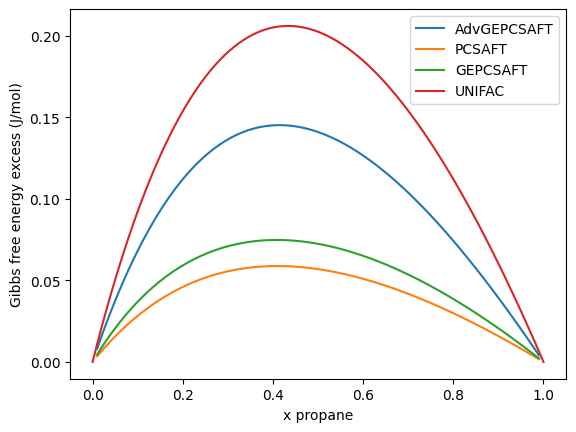

In [65]:
plt.clf()
plt.plot(x, gE[:,1]./8.314 ./T, label="AdvGEPCSAFT")
plt.plot(x, gE[:,2]./8.314 ./T, label="PCSAFT")
plt.plot(x, gE[:,3]./8.314 ./T, label="GEPCSAFT")
plt.plot(x, gE[:,4]./8.314 ./T, label="UNIFAC")
plt.xlabel("x propane")
plt.ylabel("Gibbs free energy excess (J/mol)")
plt.legend()
display(plt.gcf())

In [70]:
p=1.013e5

N = 100

x=range(1e-5,1-1e-5,length=N)
X = Clapeyron.Fractions.FractionVector.(x)

y = zeros(N*2,length(models))
T = zeros(N*2,length(models))
for i ∈ [1,2,4]
    # v0 = [353.8523023888702, log10(0.0001413174518511577), log10(0.027040696104010605),0.001,0.999]
    for j ∈ 1:100
            bub = bubble_temperature(models[i],p,X[j])
            T[j,i] = bub[1]
            y[j,i] = bub[4][1]
            v0 = [bub[1],log10(bub[2]),log10(bub[3]),bub[4][1],bub[4][2]]
    end
    y[101:end,i] .= reverse(x[1:end])
    T[101:end,i] .= reverse(T[1:N,i])
end

In [71]:
Exp = [353.25	0.0000	0.0000;
350.75	0.0730	0.1400;
348.25	0.1720	0.2680;
346.55	0.2680	0.3760;
345.15	0.3720	0.4600;
344.05	0.4620	0.5400;
343.15	0.5850	0.6440;
342.55	0.6920	0.7250;
342.25	0.7920	0.8070;
342.15	0.8280	0.8380;
342.05	0.8830	0.8880;
341.95	0.9470	0.9500;
341.95	0.9620	0.9640;
341.95	1.0000	1.0000]

14×3 Matrix{Float64}:
 353.25  0.0    0.0
 350.75  0.073  0.14
 348.25  0.172  0.268
 346.55  0.268  0.376
 345.15  0.372  0.46
 344.05  0.462  0.54
 343.15  0.585  0.644
 342.55  0.692  0.725
 342.25  0.792  0.807
 342.15  0.828  0.838
 342.05  0.883  0.888
 341.95  0.947  0.95
 341.95  0.962  0.964
 341.95  1.0    1.0

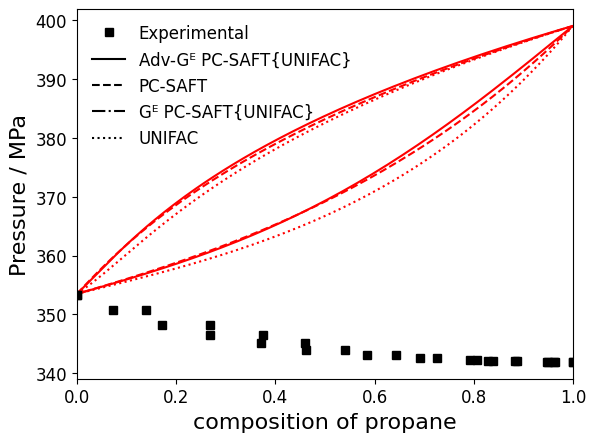

In [73]:
plt.clf()
plt.plot(y[:,1],T[:,1],label="",linestyle="-",color="red")
plt.plot(y[:,2],T[:,2],label="",linestyle="--",color="red")
# plt.plot(y[:,3],T[:,3],label="",linestyle="-.",color="red")
plt.plot(y[:,4],T[:,4],label="",linestyle=":",color="red")

plt.plot(Exp[:,2],Exp[:,1],label="Experimental",linestyle="",marker="s",color="black")
plt.plot(Exp[:,3],Exp[:,1],label="",linestyle="",marker="s",color="black")


# plt.plot(y[1][2],p[1][2]./1e6,label="",linestyle="--",color="red")
# plt.plot(y[1][3],p[1][3]./1e6,label="",linestyle="-.",color="red")
# plt.plot(y[1][4],p[1][4]./1e6,label="",linestyle=":",color="red")
# plt.plot(y[1][3],p[1][3]./1e6,label="",linestyle="--",color="red")
# plt.plot(y[5][1],p[5][1]./1e6,label="",linestyle=":",color="red")

# plt.plot(y[2][1],p[2][1]./1e6,label="",linestyle="-",color="blue")
# plt.plot(y[2][2],p[2][2]./1e6,label="",linestyle="--",color="blue")
# plt.plot(y[2][3],p[2][3]./1e6,label="",linestyle="-.",color="blue")
# plt.plot(y[2][4],p[2][4]./1e6,label="",linestyle=":",color="blue")
# plt.plot(y[6][1],p[6][1]./1e6,label="",linestyle=":",color="blue")

# plt.plot(y[3][1],p[3][1]./1e6,label="",linestyle="-",color="green")
# plt.plot(y[3][2],p[3][2]./1e6,label="",linestyle="--",color="green")
# plt.plot(y[3][3],p[3][3]./1e6,label="",linestyle="-.",color="green")
# plt.plot(y[3][4],p[3][4]./1e6,label="",linestyle=":",color="green")

# plt.plot(y[4][1],p[4][1]./1e6,label="",linestyle="-",color="purple")
# plt.plot(y[4][2],p[4][2]./1e6,label="",linestyle="--",color="purple")
# plt.plot(y[4][3],p[4][3]./1e6,label="",linestyle="-.",color="purple")
# plt.plot(y[4][4],p[4][4]./1e6,label="",linestyle=":",color="purple")

# plt.plot(y[4][1],p[4][1]./1e6,label="",linestyle="-",color="purple")
# plt.plot(y[4][2],p[4][2]./1e6,label="",linestyle="--",color="purple")

plt.plot([],[],label="Adv-Gᴱ PC-SAFT{UNIFAC}",linestyle="-",color="black")
plt.plot([],[],label="PC-SAFT",linestyle="--",color="black")
plt.plot([],[],label="Gᴱ PC-SAFT{UNIFAC}",linestyle="-.",color="black")
plt.plot([],[],label="UNIFAC",linestyle=":",color="black")

# plt.plot(y[3],p[3]./1e6,label="UNIFAC",linestyle="--")

plt.legend(loc="upper left",frameon=false,fontsize=12) 
plt.xlabel("composition of propane",fontsize=16)
plt.ylabel("Pressure / MPa",fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.ylim([0,9])
plt.xlim([0,1])
display(plt.gcf())
# plt.savefig("pxy_prop_dec.pdf")

## Benzene+propane

In [ ]:
sys = ["propane","benzene"]
model1 = GEPCSAFT(sys)
model2 = PCSAFT(sys)
model3 = UNIFAC(sys;puremodel=PCSAFT)

models = [model1,model2,model3];

In [ ]:
T = [310.93,344.26,377.59,410.93,444.26,477.59]
xend1 = [1-1e-10,1-1e-10,1-1e-10]
xend2 = [1-1e-10,1-1e-10,1-1e-10]
xend3 = [0.9,0.9]
xend4 = [0.87,0.85]
xend5 = [0.6,0.6]
xend6 = [0.59,0.58]
xend = [xend1,xend2,xend3,xend4,xend5,xend6]


y = []
p = []

for k ∈ 1:6
    p1 = []
    y1 = []
    for i ∈ 1:2
        bub = []
        v0 =[]
        x = range(1e-10,xend[k][i],length=100)
        X = Clapeyron.Fractions.FractionVector.(x)
        for j ∈ 1:100
            if j==1
                append!(bub, [bubble_pressure(models[i],T[k],X[j])])
                v0 = [log10(bub[j][2]),log10(bub[j][3]),bub[j][4][1],bub[j][4][2]]
            else
                append!(bub, [bubble_pressure(models[i],T[k],X[j];v0=v0)])
                v0 = [log10(bub[j][2]),log10(bub[j][3]),bub[j][4][1],bub[j][4][2]]
            end
        end
        append!(y1,[append!([bub[i][4][1] for i ∈ 1:100],reverse(x))])
        append!(p1,[append!([bub[i][1] for i ∈ 1:100],[bub[i][1] for i ∈ 100:-1:1])])
    end
    append!(y,[y1])
    append!(p,[p1])
end


for k ∈ 1:2
    p1 = []
    y1 = []
    for i ∈ 3
        bub = []
        v0 =[]
        x = range(1e-10,xend[k][i],length=100)
        X = Clapeyron.Fractions.FractionVector.(x)
        for j ∈ 1:100
                append!(bub, [bubble_pressure(models[i],T[k],X[j])])
        end
        append!(y1,[append!([bub[i][4][1] for i ∈ 1:100],reverse(x))])
        append!(p1,[append!([bub[i][1] for i ∈ 1:100],[bub[i][1] for i ∈ 100:-1:1])])
    end
    append!(y,[y1])
    append!(p,[p1])
end

In [ ]:
plt.clf()
plt.plot(y[1][1],p[1][1]./1e6,label="",linestyle="-",color="red")
plt.plot(y[1][2],p[1][2]./1e6,label="",linestyle="--",color="red")
plt.plot(y[7][1],p[7][1]./1e6,label="",linestyle=":",color="red")

plt.plot(y[4][1],p[4][1]./1e6,label="",linestyle="-",color="blue")
plt.plot(y[4][2],p[4][2]./1e6,label="",linestyle="--",color="blue")

plt.plot(y[6][1],p[6][1]./1e6,label="",linestyle="-",color="green")
plt.plot(y[6][2],p[6][2]./1e6,label="",linestyle="--",color="green")

plt.plot([],[],label="Gᴱ PC-SAFT{UNIFAC}",linestyle="-",color="black")
plt.plot([],[],label="PC-SAFT",linestyle="--",color="black")
plt.plot([],[],label="UNIFAC",linestyle=":",color="black")

# plt.plot(y[3],p[3]./1e6,label="UNIFAC",linestyle="--")

plt.legend(loc="upper left",frameon=false,fontsize=12) 
plt.xlabel("composition of propane",fontsize=16)
plt.ylabel("Pressure / MPa",fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim([0,9])
plt.xlim([0,1])
display(plt.gcf())
plt.savefig("pxy_prop_benz.pdf")

## Benzene+2-propanol

In [74]:
sys = ["benzene","2-propanol"]
model1 = AdvGEPCSAFT(sys; activity=UNIFAC)
model2 = PCSAFT(sys)
model3 = GEPCSAFT(sys; activity=UNIFAC)
model4 = UNIFAC(sys; puremodel=PCSAFT)

models = [model1,model2,model3, model4];

In [84]:
T = [303.15,318.15,333.15]


y = []
p = []

for k ∈ 1:3
    p1 = []
    y1 = []
    for i ∈ 1:3
        bub = []
        v0 =[]
        x = range(1e-10,1-1e-10,length=100)
        X = Clapeyron.Fractions.FractionVector.(x)
        if i!=3
            for j ∈ 1:100
                if j==1
                    append!(bub, [bubble_pressure(models[i],T[k],X[j])])
                    v0 = [log10(bub[j][2]),log10(bub[j][3]),bub[j][4][1],bub[j][4][2]]
                else
                    append!(bub, [bubble_pressure(models[i],T[k],X[j];v0=v0)])
                    v0 = [log10(bub[j][2]),log10(bub[j][3]),bub[j][4][1],bub[j][4][2]]
                end
            end
            append!(y1,[append!([bub[i][4][1] for i ∈ 1:100],reverse(x))])
            append!(p1,[append!([bub[i][1] for i ∈ 1:100],[bub[i][1] for i ∈ 100:-1:1])])
        else
            for j ∈ 1:100
                append!(bub, [bubble_pressure(models[i],T[k],X[j])])
            end
            append!(y1,[append!([bub[i][4][1] for i ∈ 1:100],reverse(x))])
            append!(p1,[append!([bub[i][1] for i ∈ 1:100],[bub[i][1] for i ∈ 100:-1:1])])
        end
    end
    append!(y,[y1])
    append!(p,[p1])
end

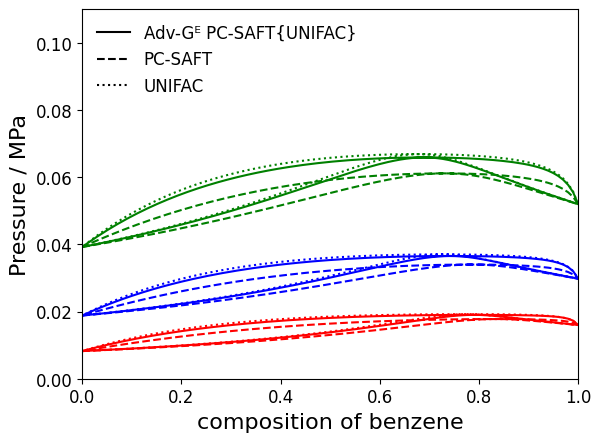

In [85]:
plt.clf()
plt.plot(y[1][1],p[1][1]./1e6,label="",linestyle="-",color="red")
plt.plot(y[1][2],p[1][2]./1e6,label="",linestyle="--",color="red")
plt.plot(y[1][3],p[1][3]./1e6,label="",linestyle=":",color="red")

plt.plot(y[2][1],p[2][1]./1e6,label="",linestyle="-",color="blue")
plt.plot(y[2][2],p[2][2]./1e6,label="",linestyle="--",color="blue")
plt.plot(y[2][3],p[2][3]./1e6,label="",linestyle=":",color="blue")

plt.plot(y[3][1],p[3][1]./1e6,label="",linestyle="-",color="green")
plt.plot(y[3][2],p[3][2]./1e6,label="",linestyle="--",color="green")
plt.plot(y[3][3],p[3][3]./1e6,label="",linestyle=":",color="green")

plt.plot([],[],label="Adv-Gᴱ PC-SAFT{UNIFAC}",linestyle="-",color="black")

plt.plot([],[],label="PC-SAFT",linestyle="--",color="black")
plt.plot([],[],label="UNIFAC",linestyle=":",color="black")

# plt.plot(y[3],p[3]./1e6,label="UNIFAC",linestyle="--")

plt.legend(loc="upper left",frameon=false,fontsize=12) 
plt.xlabel("composition of benzene",fontsize=16)
plt.ylabel("Pressure / MPa",fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim([0,0.11])
plt.xlim([0,1])
display(plt.gcf())
# plt.savefig("pxy_Benz_2PropOH.pdf")

## Hexane+methanol

In [105]:
mixture = ["methanol","hexane"]

model1 = AdvGEPCSAFT(mixture;activity=NRTL)
model2 = PCSAFT(mixture)
model3 = NRTL(mixture)

models = [model1,model2,model3];

In [ ]:
p=1.013e5

x=range(1e-5,1-1e-5,length=100)
X = Clapeyron.Fractions.FractionVector.(x)

y = []
T = []
for i ∈ 1:2
    bub = []
    v0 = [341.8523023888702, log10(0.0001413174518511577), log10(0.027040696104010605),0.001,0.999]
    for j ∈ 1:100
            append!(bub, [bubble_temperature(models[i],p,X[j];v0=v0)])
            v0 = [bub[j][1],log10(bub[j][2]),log10(bub[j][3]),bub[j][4][1],bub[j][4][2]]
    end
    append!(y,[append!([bub[i][4][1] for i ∈ 1:100],reverse(x))])
    append!(T,[append!([bub[i][1] for i ∈ 1:100],[bub[i][1] for i ∈ 100:-1:1])])
end

for i ∈ 3
    bub = []
    v0 = []
    for j ∈ 1:100
            append!(bub, [bubble_temperature(models[i],p,X[j])])
    end
    append!(y,[append!([bub[i][4][1] for i ∈ 1:100],reverse(x))])
    append!(T,[append!([bub[i][1] for i ∈ 1:100],[bub[i][1] for i ∈ 100:-1:1])])
end

In [ ]:
N=400
x2 = range(0.05,0.253,length=N)
X2 = Clapeyron.Fractions.FractionVector.(x2)

xx = []
T2 = []
lle = []

for i ∈ 1:1
    v0 = [289.06401114502336, log10(0.0001266723503732177), log10(8.124586169994976e-5), 0.5526971788543216, 0.44730282114567843]
    for j ∈ 1:N
        append!(lle, [LLE_temperature(models[i],p,X2[j];v0=v0)])
        v0 = [lle[j][1],log10(lle[j][2]),log10(lle[j][3]),lle[j][4][1],lle[j][4][2]]
    end
    append!(xx,[append!([lle[i][4][1] for i ∈ 1:N],reverse(x2))])
    append!(T2,[append!([lle[i][1] for i ∈ 1:N],[lle[i][1] for i ∈ N:-1:1])])
end

T3 = range(290,313,length=N)
T4 = []
for i ∈ 3
    lle = []
    v0 = []
    for j ∈ 1:N
        if j==1
            append!(lle, [LLE(models[i],T3[j])])
            v0 = [lle[j][1][1],lle[j][2][1]]
        else
            append!(lle, [LLE(models[i],T3[j];v0=v0)])
            v0 = [lle[j][1][1],lle[j][2][1]]
        end
    end
    append!(xx,[append!([lle[i][1][1] for i ∈ 1:N],[lle[i][2][1] for i ∈ N:-1:1])])
    append!(T4,[append!([T3[i] for i ∈ 1:N],[T3[i] for i ∈ N:-1:1])])

end

In [103]:
T

2-element Vector{Any}:
 [447.1730497670077, 431.3739612887892, 414.40586587504606, 397.2923306885629, 381.30835856449687, 367.2875432168087, 355.38399849624807, 345.35364702091357, 336.85054391877844, 329.5601013225741  …  329.5601013225741, 336.85054391877844, 345.35364702091357, 355.38399849624807, 367.2875432168087, 381.30835856449687, 397.2923306885629, 414.40586587504606, 431.3739612887892, 447.1730497670077]
 [447.16759926387493, 425.32836569209616, 402.202239543906, 380.7410307210285, 362.9911192531921, 348.9829873984348, 337.8999791211074, 328.9509339572162, 321.5570138945334, 315.31933474756175  …  315.31933474756175, 321.5570138945334, 328.9509339572162, 337.8999791211074, 348.9829873984348, 362.9911192531921, 380.7410307210285, 402.202239543906, 425.32836569209616, 447.16759926387493]

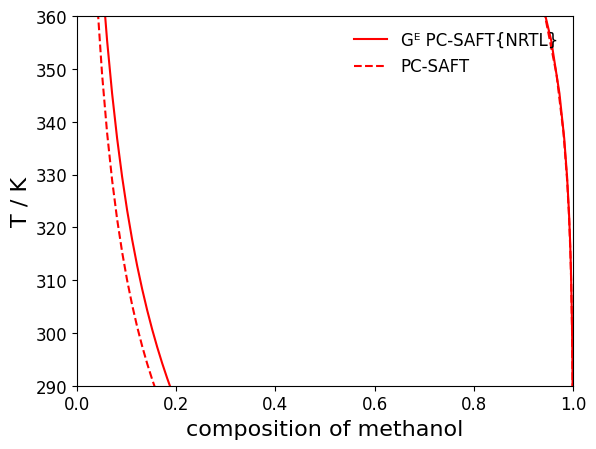

In [104]:
plt.clf()
plt.plot(y[1],T[1],label="Gᴱ PC-SAFT{NRTL}",linestyle="-",color="red")
plt.plot(y[2],T[2],label="PC-SAFT",linestyle="--",color="red")
# plt.plot(y[3],T[3],label="NRTL",linestyle=":",color="red")

# plt.plot(xx[1],T2[1],label="",linestyle="-",color="red")
# plt.plot(xx[2],T4[1],label="",linestyle=":",color="red")

plt.legend(loc="upper right",frameon=false,fontsize=12) 
plt.xlabel("composition of methanol",fontsize=16)
plt.ylabel("T / K",fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim([290,360])
plt.xlim([0,1])
display(plt.gcf())
# plt.savefig("Txy_hex_meoh.pdf")

## Water+ethanol

In [ ]:
model1 = GEPCSAFT(["ethanol","water"];activity=COSMOSACdsp)
model2 = PCSAFT(["ethanol","water"])
model3 = COSMOSACdsp(["ethanol","water"];puremodel=PCSAFT)

models = [model1,model2,model3];

In [ ]:
p=1.013e5

x=range(1e-5,1-1e-5,length=100)
X = Clapeyron.Fractions.FractionVector.(x)

y = []
T = []
for i ∈ 1:2
    bub = []
    v0 = [373.18049481630885, log10(2.051092808220833e-5), log10(0.03015608493442993),0.001,0.999]
    for j ∈ 1:100
            append!(bub, [bubble_temperature(models[i],p,X[j];v0=v0)])
            v0 = [bub[j][1],log10(bub[j][2]),log10(bub[j][3]),bub[j][4][1],bub[j][4][2]]
    end
    append!(y,[append!([bub[i][4][1] for i ∈ 1:100],reverse(x))])
    append!(T,[append!([bub[i][1] for i ∈ 1:100],[bub[i][1] for i ∈ 100:-1:1])])
end

for i ∈ 3
    bub = []
    v0 = []
    for j ∈ 1:100
            append!(bub, [bubble_temperature(models[i],p,X[j];T0=335)])
    end
    append!(y,[append!([bub[i][2][1] for i ∈ 1:100],reverse(x))])
    append!(T,[append!([bub[i][1] for i ∈ 1:100],[bub[i][1] for i ∈ 100:-1:1])])
end

In [ ]:
plt.clf()
plt.plot(y[1],T[1],label="Gᴱ PC-SAFT{COSMO-SAC-dsp}",linestyle="-",color="blue")
plt.plot(y[2],T[2],label="PC-SAFT",linestyle="--",color="blue")
plt.plot(y[3],T[3],label="COSMO-SAC-dsp",linestyle=":",color="blue")

# plt.plot(xx[1],T2[1],label="",linestyle="-",color="red")
# plt.plot(xx[2],T4[1],label="",linestyle=":",color="red")

plt.legend(loc="upper right",frameon=false,fontsize=12) 
plt.xlabel("composition of ethanol",fontsize=16)
plt.ylabel("T / K",fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim([350,375])
plt.xlim([0,1])
display(plt.gcf())
plt.savefig("Txy_Assoc_EtOH.pdf")

## Acetonitrile+water

In [ ]:
model1 = GEPCSAFT(["acetonitrile","water"];activity=Wilson)
model2 = PCSAFT(["acetonitrile","water"])
model3 = Wilson(["acetonitrile","water"];puremodel=PCSAFT)

models = [model1,model2,model3];

In [ ]:
p=1.013e5

x=range(1e-5,1-1e-5,length=100)
X = Clapeyron.Fractions.FractionVector.(x)

y = []
T = []
for i ∈ 1:2
    bub = []
    v0 = [374.71636596256286, log10(2.0524576235486944e-5), log10(0.030178487325251392),0.001,0.999]
    for j ∈ 1:100
            append!(bub, [bubble_temperature(models[i],p,X[j];v0=v0)])
            v0 = [bub[j][1],log10(bub[j][2]),log10(bub[j][3]),bub[j][4][1],bub[j][4][2]]
    end
    append!(y,[append!([bub[i][4][1] for i ∈ 1:100],reverse(x))])
    append!(T,[append!([bub[i][1] for i ∈ 1:100],[bub[i][1] for i ∈ 100:-1:1])])
end

for i ∈ 3
    bub = []
    v0 = []
    for j ∈ 1:100
            append!(bub, [bubble_temperature(models[i],p,X[j];T0=335)])
    end
    append!(y,[append!([bub[i][2][1] for i ∈ 1:100],reverse(x))])
    append!(T,[append!([bub[i][1] for i ∈ 1:100],[bub[i][1] for i ∈ 100:-1:1])])
end

In [ ]:
plt.clf()
plt.plot(y[1],T[1],label="Gᴱ PC-SAFT{Wilson}",linestyle="-",color="red")
plt.plot(y[2],T[2],label="PC-SAFT",linestyle="--",color="red")
plt.plot(y[3],T[3],label="Wilson",linestyle=":",color="red")

# plt.plot(xx[1],T2[1],label="",linestyle="-",color="red")
# plt.plot(xx[2],T4[1],label="",linestyle=":",color="red")

plt.legend(loc="upper right",frameon=false,fontsize=12) 
plt.xlabel("composition of ACN",fontsize=16)
plt.ylabel("T / K",fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.ylim([290,360])
plt.xlim([0,1])
display(plt.gcf())
plt.savefig("Txy_Assoc_ACN.pdf")

## 1-propanol+benzene

In [ ]:
model1 = GEPCSAFT(["1-propanol","benzene"])
model2 = PCSAFT(["1-propanol","benzene"])
model3 = UNIFAC(["1-propanol","benzene"])
models = [model1,model2,model3];
x = range(0,1,length=100)
X = Clapeyron.FractionVector.(x)
H_E = []
for i ∈ 1:3
    append!(H_E,[mixing.(models[i],1e5,313.15,X,enthalpy)])
end

In [ ]:
plt.clf()
plt.plot(1 .-x,H_E[1]./1e3,label="Gᴱ PC-SAFT{UNIFAC}",color="green",linestyle="-")
plt.plot(1 .-x,H_E[2]./1e3,label="PC-SAFT",color="green",linestyle="--")
plt.plot(1 .-x,H_E[3]./1e3,label="UNIFAC",color="green",linestyle="-.")

plt.xlabel("composition of 1-propanol",fontsize=16)
plt.ylabel("Excess Enthalpy / (kJ/mol)",fontsize=16)
# plt.ylim([0.,0.6])
plt.xlim([0,1])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(frameon=false,fontsize=12,loc="upper left") 
display(plt.gcf())


# Cyclohexane+decane

In [ ]:
model1 = GEPCSAFT(["cyclohexane","decane"])
model2 = PCSAFT(["cyclohexane","decane"])
model3 = UNIFAC(["cyclohexane","decane"])
models = [model1,model2,model3];
x = range(0,1,length=100)
X = Clapeyron.FractionVector.(x)
H_E = []
for i ∈ 1:3
    append!(H_E,[mixing.(models[i],1e5,298.15,X,enthalpy)])
end

In [ ]:
plt.clf()
plt.plot(x,H_E[1]./1e3,label="Gᴱ PC-SAFT{UNIFAC}",color="purple",linestyle="-")
plt.plot(x,H_E[2]./1e3,label="PC-SAFT",color="purple",linestyle="--")
plt.plot(x,H_E[3]./1e3,label="UNIFAC",color="purple",linestyle="-.")

plt.xlabel("composition of cyclohexane",fontsize=16)
plt.ylabel("Excess Enthalpy / (kJ/mol)",fontsize=16)
plt.ylim([0.,0.6])
plt.xlim([0,1])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(frameon=false,fontsize=12,loc="upper left") 
display(plt.gcf())
plt.savefig("cyclohexane_decane_HE.pdf")

# 2-propanol + benzene

In [ ]:
model1 = GEPCSAFT(["2-propanol","benzene"])
model2 = PCSAFT(["2-propanol","benzene"])
# model3 = UNIFAC(["1-propanol","benzene"])
models = [model1,model2,model3];
x = range(0,1,length=100)
X = Clapeyron.FractionVector.(x)
V_E = []
for i ∈ 1:2
    append!(V_E,[mixing.(models[i],1e5,303.15,X,volume)])
end

In [ ]:
plt.clf()
plt.plot(1 .-x,V_E[1]./1e-6,label="Gᴱ PC-SAFT{UNIFAC}",color="blue",linestyle="-")
plt.plot(1 .-x,V_E[2]./1e-6,label="PC-SAFT",color="blue",linestyle="--")

plt.xlabel("composition of 2-propanol",fontsize=16)
plt.ylabel("Excess Volume / (cm³/mol)",fontsize=16)
plt.ylim([-0.2,0.7])
plt.xlim([0,1])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(frameon=false,fontsize=12,loc="upper left")
display(plt.gcf())
plt.savefig("2propanol_benzene_VE.pdf",bbox_inches="tight")

# Decane+hexadecane

In [ ]:
model1 = GEPCSAFT(["decane","hexadecane"])
model2 = PCSAFT(["decane","hexadecane"])
model3 = UNIFAC(["decane","hexadecane"];puremodel=PCSAFT)
models = [model1,model2,model3];

x = range(0,1,length=100)
X = Clapeyron.FractionVector.(x)
V_E = []
for i ∈ 1:2
    append!(V_E,[mixing.(models[i],1e5,298.15,X,volume)])
end

In [ ]:
plt.clf()
plt.plot(x,V_E[1]./1e-6,label="Gᴱ PC-SAFT{UNIFAC}",color="red",linestyle="-")
plt.plot(x,V_E[2]./1e-6,label="PC-SAFT",color="red",linestyle="--")

plt.xlabel("composition of decane",fontsize=16)
plt.ylabel("Excess Volume / (cm³/mol)",fontsize=16)
plt.ylim([-0.12,0.02])
plt.xlim([0,1])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(frameon=false,fontsize=12,loc="lower left")
display(plt.gcf())
plt.savefig("hexadec_decane_VE.pdf",bbox_inches="tight")

# Hexane + Benzene + Methanol

In [ ]:
sys = ["methanol","hexane","benzene"]
model1 = GEPCSAFT(sys)
model2 = PCSAFT(sys)
model3 = UNIFAC(sys)

In [ ]:
N=1000
xend=0.475
x_GEPCSAFT = zeros(2*N,3)
K0=[0.064655,2.10947,1.73718]

method = MichelsenTPFlash(K0 =K0, equilibrium= :lle)
z = [0.15995,0.73995,0.0001]
z = z./sum(z)
for i ∈ 1:N
    flash = tp_flash(model1,1e5,284.15,z,method)
    x_GEPCSAFT[i,:] = flash[1][1,:]
    x_GEPCSAFT[2*N-i+1,:] = flash[1][2,:]
    K0 = x_GEPCSAFT[2*N-i+1,:]./x_GEPCSAFT[i,:]
    method = MichelsenTPFlash(K0 =K0, equilibrium= :lle)
    z[2] = z[2]-xend/N
    z[3] = z[3]+xend/N
end

In [ ]:
function LLE_tern(model,T,n;v0=nothing)
    if v0 === nothing
        if length(model) == 3
            v0 = [0.05,0.9,0.05,0.9]
        else
            throw(error("unable to provide an initial point for LLE pressure"))
        end
    end
    
    len = length(v0)

    Fcache = zeros(eltype(v0),len)
    f!(F,z) = Obj_LLE_tern(model, F, T, n, z[1:2], z[3:4])
    r  = Clapeyron.Solvers.nlsolve(f!,v0,Clapeyron.LineSearch(Clapeyron.Newton()))
    sol = Clapeyron.Solvers.x_sol(r)
    x = sol[1:2]
    xx = sol[3:4]
    return x,xx
end

function Obj_LLE_tern(model, F, T, n, x, xx)
    ϕ = (n[1]-x[1])/(xx[1]-x[1])
    x = Clapeyron.Fractions.FractionVector(x)
    xx = Clapeyron.Fractions.FractionVector(xx)
    γₐ = activity_coefficient(model,1e-3,T,x)
    γᵦ = activity_coefficient(model,1e-3,T,xx)

    F[1:3] = γᵦ.*xx-γₐ.*x
    F[4] = ϕ*(xx[2]-x[2])-(n[2]-x[2])
    return F
end

In [ ]:
N=100
xend=0.4
x_UNIFAC = zeros(2*N,3)
K0=[0.064655  2.10947  1.73718]
z = [0.5,0.4999999,0.0000001]
z = z./sum(z)
v0 = [0.06505262303639518, 1-0.06505262303639518, 0.8546350621671894, 1-0.8546350621671894]
for i ∈ 1:N
    lle = LLE_tern(model3,283.15,z;v0=v0)
    x_UNIFAC[i,:] = [lle[1][1],lle[1][2],1-sum(lle[1])]
    x_UNIFAC[2*N-i+1,:] =  [lle[2][1],lle[2][2],1-sum(lle[2])]
    v0 = [lle[1][1],lle[1][2],lle[2][1],lle[2][2]]
    z[2] = z[2]-xend/N/2
    z[3] = z[3]+xend/N/2
end

In [ ]:
plt.clf()
figure, tax = ternary.figure(scale=1.0)
figure.set_size_inches(9, 9)

tax.boundary()
tax.gridlines(multiple=0.2, color="black")
tax.left_axis_label("benzene", fontsize=16, offset=0.15)
tax.right_axis_label("hexane", fontsize=16, offset=0.15)
tax.bottom_axis_label("methanol", fontsize=16, offset=0.02)

# Plot the data
tax.plot(x_GEPCSAFT, linewidth=2.0,color="b",linestyle="-", label="Gᴱ PC-SAFT{UNIFAC}")
tax.plot(x_UNIFAC, linewidth=2.0,color="b",linestyle=":", label="UNIFAC")


tax.ticks(axis="lbr", multiple=0.2, linewidth=1,fontsize=12, tick_formats="%.1f", offset=0.02)

tax.get_axes().axis("off")
tax.clear_matplotlib_ticks()
tax.legend(loc="upper right",frameon=false,fontsize=14)
tax.savefig("MeOH_Benz_Hx_tern.pdf")
display(plt.gcf())

# Ethane + _n_-decane and + _n_-eicosane

In [ ]:
sys = ["eicosane","ethane"]
model1 = GEPCSAFT(sys)
model2 = PCSAFT(sys)

models = [model1,model2];

In [ ]:
p_1 = []
p_2 = []
T_1 = []
T_2 = []
for j=1:2
    pure = split_model(models[j])
    crit = crit_pure.(pure)
    T = []
    sat = []
    for i=1:2
        append!(T,[range(0.7*crit[i][1],crit[i][1]*0.98,length=200)])
        append!(sat,[saturation_pressure.(pure[i],T[i])])
    end

    append!(p_1,[[sat[1][i][1] for i ∈ 1:200]])
    append!(p_1[j],[crit[1][2]])
    append!(p_2,[[sat[2][i][1] for i ∈ 1:200]])
    append!(p_2[j],[crit[2][2]])
    append!(T_1,[[T[1][i] for i ∈ 1:200]])
    append!(T_1[j],[crit[1][1]])
    append!(T_2,[[T[2][i] for i ∈ 1:200]])
    append!(T_2[j],[crit[2][1]])
end

In [ ]:
N=4000
x = range(1,0,length=N)
X = Clapeyron.FractionVector.(x)
T_crit = []
p_crit = []
for j=1:2
    T = []
    p = []
    
    v0 = []
    for i=1:N
        if i==1
            mix_crit = crit_mix(models[j],X[i]) 
            v0 = [log10(mix_crit[3]),mix_crit[1]]
            append!(T,mix_crit[1])
            append!(p,mix_crit[2])
        else
            mix_crit = crit_mix(models[j],X[i];v0=v0)
            v0 = [log10(mix_crit[3]),mix_crit[1]]
            append!(T,mix_crit[1])
            append!(p,mix_crit[2])
        end
    end
    append!(T_crit,[T])
    append!(p_crit,[p])
end

In [ ]:
N=200
x = range(0,0.0001,length=N)
X = Clapeyron.FractionVector.(x)
# T_crit = []
# p_crit = []
for j=1:2
    T = []
    p = []
    
    v0 = []
    for i=1:N
        if i==1
            mix_crit = crit_mix(models[j],X[i]) 
            v0 = [log10(mix_crit[3]),mix_crit[1]]
            append!(T,mix_crit[1])
            append!(p,mix_crit[2])
        else
            mix_crit = crit_mix(models[j],X[i];v0=v0)
            v0 = [log10(mix_crit[3]),mix_crit[1]]
            append!(T,mix_crit[1])
            append!(p,mix_crit[2])
        end
    end
    append!(T_crit,[T])
    append!(p_crit,[p])
end

In [ ]:
N=100
Td = range(300,298.2,length=N)
Tu = range(300,309.4,length=N)

T3 = zeros(2*N)
p3 = zeros(2*N)
vv = zeros(2*N)
vl = zeros(2*N)
vll = zeros(2*N)
vu = [log10(8.451915178727972e-5),log10(9.007404686645136e-5),log10(0.0002966803518007113),0.028856826472249096,0.0055943637269372124,1.7306042899332825e-7]
vd = [log10(8.451915178727972e-5),log10(9.007404686645136e-5),log10(0.0002966803518007113),0.028856826472249096,0.0055943637269372124,1.7306042899332825e-7]
for i ∈ 1:N
    vlld = VLLE_pressure(model2,Td[i];v0=vd)
    vllu = VLLE_pressure(model2,Tu[i];v0=vu)
    
    p3[N+i]=vllu[1]
    p3[N-i+1]=vlld[1]

    T3[N+i]=Tu[i]
    T3[N-i+1]=Td[i]

    vl[N+i]=vllu[2]
    vl[N-i+1]=vlld[2]

    vll[N+i]=vllu[3]
    vll[N-i+1]=vlld[3]

    vv[N+i]=vllu[4]
    vv[N-i+1]=vlld[4]


    vd = [log10(vlld[2]),log10(vlld[3]),log10(vlld[4]),log10(vlld[5][1]),log10(vlld[6][1]),log10(vlld[7][1])]
    vu = [log10(vllu[2]),log10(vllu[3]),log10(vllu[4]),log10(vllu[5][1]),log10(vllu[6][1]),log10(vllu[7][1])]

end

In [ ]:
N=100
Tu = range(270.,309.,length=N)
Td = range(270.,220.,length=N)

T4 = zeros(2*N)
p4 = zeros(2*N)
vv = zeros(2*N)
vl = zeros(2*N)
vll = zeros(2*N)
vd = [log10(8.42778273189536e-5),log10(7.324483298679523e-5),log10(0.0007324139893807051),0.06751494038995015,0.0008986348479732185,2.349081071400961e-11]
vu = [log10(8.42778273189536e-5),log10(7.324483298679523e-5),log10(0.0007324139893807051),0.06751494038995015,0.0008986348479732185,2.349081071400961e-11]

for i ∈ 1:N
    println(i)
    vlld = VLLE_pressure(model1,Td[i];v0=vd)
    vllu = VLLE_pressure(model1,Tu[i];v0=vu)
    
    p4[N+i]=vllu[1]
    p4[N-i+1]=vlld[1]

    T4[N+i]=Tu[i]
    T4[N-i+1]=Td[i]

    vl[N+i]=vllu[2]
    vl[N-i+1]=vlld[2]

    vll[N+i]=vllu[3]
    vll[N-i+1]=vlld[3]

    vv[N+i]=vllu[4]
    vv[N-i+1]=vlld[4]


    vd = [log10(vlld[2]),log10(vlld[3]),log10(vlld[4]),log10(vlld[5][1]),log10(vlld[6][1]),log10(vlld[7][1])]
    vu = [log10(vllu[2]),log10(vllu[3]),log10(vllu[4]),log10(vllu[5][1]),log10(vllu[6][1]),log10(vllu[7][1])]
end

In [ ]:
sys = ["ethane","decane"]
model1 = GEPCSAFT(sys)
model2 = PCSAFT(sys)

models = [model1,model2];

In [ ]:
p_3 = []
p_4 = []
T_3 = []
T_4 = []
for j=1:2
    pure = split_model(models[j])
    crit = crit_pure.(pure)
    T = []
    sat = []
    for i=1:2
        append!(T,[range(0.7*crit[i][1],crit[i][1]*0.98,length=100)])
        append!(sat,[saturation_pressure.(pure[i],T[i])])
    end

    append!(p_3,[[sat[1][i][1] for i ∈ 1:100]])
    append!(p_3[j],[crit[1][2]])
    append!(p_4,[[sat[2][i][1] for i ∈ 1:100]])
    append!(p_4[j],[crit[2][2]])
    append!(T_3,[[T[1][i] for i ∈ 1:100]])
    append!(T_3[j],[crit[1][1]])
    append!(T_4,[[T[2][i] for i ∈ 1:100]])
    append!(T_4[j],[crit[2][1]])
end

In [ ]:
N=200
x = range(0,1,length=N)
X = Clapeyron.FractionVector.(x)
# T_crit = []
# p_crit = []
for j=1:2
    T = []
    p = []
    
    v0 = []
    for i=1:N
        if i==1
            mix_crit = crit_mix(models[j],X[i]) 
            v0 = [log10(mix_crit[3]),mix_crit[1]]
            append!(T,mix_crit[1])
            append!(p,mix_crit[2])
        else
            mix_crit = crit_mix(models[j],X[i];v0=v0)
            v0 = [log10(mix_crit[3]),mix_crit[1]]
            append!(T,mix_crit[1])
            append!(p,mix_crit[2])
        end
    end
    append!(T_crit,[T])
    append!(p_crit,[p])
end

In [ ]:
plt.clf()
fig, ax1 = plt.subplots()
ax1.plot(Exp[:,1],Exp[:,2],label="",linestyle="",marker="o",color="w",markeredgecolor="b")

ax1.plot(T_1[1],p_1[1]./1e6,label="",linestyle="-",color="k")
ax1.plot(T_4[1],p_4[1]./1e6,label="",linestyle="-",color="k")
ax1.plot(T_2[1],p_2[1]./1e6,label="",linestyle="-",color="k")

ax1.plot(T_crit[1][1:3954],p_crit[1][1:3954]./1e6,label="",linestyle="-.",color="r")
ax1.plot(T_crit[2][1:3942],p_crit[2][1:3942]./1e6,label="",linestyle="--",color="r")
ax1.plot(T3,p3./1e6,label="",linestyle=":",color="r")

ax1.plot(T_crit[5],p_crit[5]./1e6,label="",linestyle="-.",color="b")
ax1.plot(T_crit[6],p_crit[6]./1e6,label="",linestyle="--",color="b")

ax1.plot(T_1[1][end],p_1[1][end]./1e6,label="",marker="^",linestyle="",color="k")
ax1.plot(T_2[1][end],p_2[1][end]./1e6,label="",marker="^",linestyle="",color="k")
ax1.plot(T_4[1][end],p_4[1][end]./1e6,label="",marker="^",linestyle="",color="k")


ax1.plot(T3[1],p3[1]./1e6,label="",linestyle="",marker="s",color="w",markeredgecolor="r")
ax1.plot(T3[end],p3[end]./1e6,label="",linestyle="",marker="s",color="w",markeredgecolor="r")
ax1.plot(T4[end],p4[end]./1e6,label="",linestyle="",marker="s",color="w",markeredgecolor="r")
ax1.plot(T3,p3./1e6,label="",linestyle=":",color="r")
ax1.plot(T4,p4./1e6,label="",linestyle=linestyle=(0, (3, 1, 1, 1)),color="r")

ax1.plot([],[],label="C₂H₆+n-C₁₀H₂₂",linestyle="-",color="b")
ax1.plot([],[],label="C₂H₆+n-C₂₀H₄₂",linestyle="-",color="r")
ax1.plot([],[],label="Gᴱ PC-SAFT (critical)",linestyle="-.",color="k")
ax1.plot([],[],label="PC-SAFT (critical)",linestyle="--",color="k")
ax1.plot([],[],label="Gᴱ PC-SAFT (3-phase)",linestyle=(0, (3, 1, 1, 1)),color="k")
ax1.plot([],[],label="PC-SAFT (3-phase)",linestyle=":",color="k")
ax1.plot([],[],label="UCEP",linestyle="",marker="s",color="w",markeredgecolor="k")
ax1.plot([],[],label="Experimental (critical)",linestyle="",marker="o",color="w",markeredgecolor="k")


ax1.legend(loc="upper right",frameon=false,fontsize=10,ncol=2) 
ax1.set_xlabel("Temperature / K",fontsize=16)
ax1.set_ylabel("Pressure / MPa",fontsize=16)
ax1.set_ylim([0.,50.])
ax1.set_xlim([215,1000])
ax1.text(240,5,"C₂H₆")
ax1.text(620,5,"n-C₁₀H₂₂")
ax1.text(800,2.5,"n-C₂₀H₄₂")

# ax1.set_xticks(fontsize=12)
# ax1.set_yticks(fontsize=12)

left, bottom, width, height = [0.64, 0.4, 0.25, 0.25]
ax2 = fig.add_axes([left, bottom, width, height])
# ax2.plot(Exp[:,1],Exp[:,2],label="",linestyle="",marker="s",color="w",markeredgecolor="b")

ax2.plot(T_1[1],p_1[1]./1e6,label="",linestyle="-",color="k",alpha=0.3)
ax2.plot(T_3[1],p_3[1]./1e6,label="",linestyle="-",color="k",alpha=0.3)
ax2.plot(T_2[1],p_2[1]./1e6,label="",linestyle="-",color="k",alpha=0.3)

ax2.plot(T_crit[1][1:3955],p_crit[1][1:3955]./1e6,label="",linestyle="-.",color="r")
ax2.plot(T_crit[2][1:3942],p_crit[2][1:3942]./1e6,label="",linestyle="--",color="r")
ax2.plot(T3,p3./1e6,label="",linestyle=":",color="r")
ax2.plot(T4,p4./1e6,label="",linestyle=(0, (3, 1, 1, 1)),color="r")

ax2.plot(T_crit[5],p_crit[5]./1e6,label="",linestyle="-.",color="b")
ax2.plot(T_crit[6],p_crit[6]./1e6,label="",linestyle="--",color="b")


ax2.plot(T_1[1][end],p_1[1][end]./1e6,label="",marker="^",linestyle="",color="k")
ax2.plot(T_2[1][end],p_2[1][end]./1e6,label="",marker="^",linestyle="",color="k")
ax2.plot(T_3[1][end],p_3[1][end]./1e6,label="",marker="^",linestyle="",color="k")
ax2.plot(T3[1],p3[1]./1e6,label="",linestyle="",marker="s",color="w",markeredgecolor="r")
ax2.plot(T3[end],p3[end]./1e6,label="",linestyle="",marker="s",color="w",markeredgecolor="r")
ax2.plot(T4[end],p4[end]./1e6,label="",linestyle="",marker="s",color="w",markeredgecolor="r")

ax2.set_xlabel("Temperature / K",fontsize=12)
ax2.set_ylabel("Pressure / MPa",fontsize=12)
ax2.set_ylim([3.5,5.5])
ax2.set_xlim([295,325])
# ax2.legend(loc="lower right",frameon=false,fontsize=10) 
plt.savefig("crit_Eth_Dec_Eic.pdf")
display(plt.gcf())
